### Read Data

In [1]:
import os
import glob

'''
Function that recursively reads text files with
a specific extension under a given root directory
'''

def read_data(directory,file_extension,class_label):
    
    data = []
    index = []
    for filename in glob.glob(directory+'/**/*'+file_extension, recursive=True):
        email_content = ""
        with open(filename, 'r',encoding='utf-8', errors='ignore') as email:
            for line in email:
                line = line.strip('\n')
                line = line.strip('\t')
                email_content+= line
        email.close()
        data.append({'text': email_content, 'label': class_label})
        index.append(filename)
                    
    return data,index

In [3]:
import pandas as pd
from sklearn.utils import shuffle

lingspam_dataset_dir = "/lingspam_public/lemm_stop"

Ham_data,index_hamdata = read_data(lingspam_dataset_dir,"*msg[0-9].txt","Ham")
Spam_data,index_spamdata = read_data(lingspam_dataset_dir,"spmsg*.txt","Spam")
All_data, index_alldata = read_data(lingspam_dataset_dir,"*.txt","All")
data = pd.DataFrame(Ham_data,index =index_hamdata)
data = data.append(pd.DataFrame(Spam_data,index =index_spamdata))
#shufle dataframe
data = shuffle(data,random_state = 47)
pd.set_option("max_colwidth",2000)
data

label  \
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part8/6-825msg3.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part6/9-1536msg2.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part3/6-199msg2.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part4/6-81msg1.txt     Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part3/6-162msg2.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part5/9-1260msg1.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part3/6-1114msg1.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part3/6-1088msg1.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part7/6-381msg4.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part4/6-422msg1.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part7/9-1717msg2.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part9/9-22msg1.txt     Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part5/9-1184msg1.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part9/8-820msg1.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part3/6-151msg4.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part7/9-208msg1.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part5/9-1034msg1.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part8/8-1163msg1.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part5/spmsgb155.txt   Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part8/8-1075msg2.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part3/6-150msg3.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part4/8-1066msg2.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part8/6-875msg3.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part1/5-1268msg3.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part4/8-1005msg1.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part8/spmsgc102.txt   Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part2/spmsga148.txt   Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part1/spmsga100.txt   Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part2/5-1330msg1.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part9/8-977msg3.txt    Ham   
...                                                                                                        ...   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part1/3-380msg1.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part6/9-1293msg1.txt   Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part9/9-187msg1.txt    Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/lingspam_public/lemm_stop/part6/9-162msg1.txt    Ham   
/

In [4]:
count_ham=len(All_data)-len(Spam_data)
print('The number of ham emails is: All_emails-Spam_emails = Ham_emails')
print('                                 ',len(All_data),'-',len(Spam_data),'       =',count_ham)

The number of ham emails is: All_emails-Spam_emails = Ham_emails
                                  2893 - 481        = 2412


In [5]:
data.shape
data['label'].value_counts()

Ham     2412
Spam     481
Name: label, dtype: int64

### Split dataset into train and test set

In [6]:
'''
Split dataset into train (70%) & test (30%)
Transform labels to one hot encoding 
'''

import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

train, test = train_test_split(data, test_size = 0.3,random_state=1596)

X_train = list(itertools.chain.from_iterable(train[['text']].values.tolist()))
X_test = list(itertools.chain.from_iterable(test[['text']].values.tolist()))

y_train = list(itertools.chain.from_iterable(train[['label']].values.tolist()))
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(list(itertools.chain.from_iterable(test[['label']].values.tolist())))

### Feature extraction

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pprint

#Use unigram & bi-gram tf*idf features
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features = 5000,sublinear_tf=True)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

pprint.pprint(vectorizer.get_feature_names())

['00',
 '00 10',
 '00 11',
 '00 12',
 '00pm',
 '035',
 '0519',
 '0519 check',
 '08',
 '09',
 '09 30',
 '10',
 '10 00',
 '10 10',
 '10 11',
 '10 12',
 '10 15',
 '10 1998',
 '10 20',
 '10 30',
 '10 40',
 '10 45',
 '10 50',
 '10 day',
 '10 member',
 '10 million',
 '10 minute',
 '10 order',
 '100',
 '100 every',
 '100 order',
 '1000',
 '10532',
 '10532 germany',
 '10728',
 '10728 berlin',
 '10th',
 '11',
 '11 00',
 '11 10',
 '11 11',
 '11 12',
 '11 15',
 '11 30',
 '11 40',
 '11 45',
 '11 50',
 '113',
 '11th',
 '12',
 '12 10',
 '12 15',
 '12 20',
 '12 30',
 '12 45',
 '12 50',
 '12 95',
 '12 point',
 '120',
 '1200',
 '1200 publicity',
 '1204',
 '1204 john',
 '121',
 '125',
 '128',
 '12th',
 '13',
 '13 30',
 '130',
 '131',
 '1326',
 '1326 email',
 '138',
 '13th',
 '14',
 '14 30',
 '149',
 '14th',
 '15',
 '15 15',
 '15 1998',
 '15 1999',
 '15 20',
 '15 30',
 '15 45',
 '15 98',
 '15 minute',
 '150',
 '15th',
 '15th 1998',
 '16',
 '16 1998',
 '16 20',
 '16 30',
 '160',
 '161',
 '17',
 '17 19',
 

 'invite speaker',
 'invite submit',
 'invite talk',
 'invited',
 'invited speakers',
 'involve',
 'iowa',
 'ipa',
 'ipcug',
 'ireland',
 'irish',
 'irit',
 'iro umontreal',
 'irst',
 'is',
 'isabelle',
 'isbn',
 'isbn 521',
 'island',
 'isolate',
 'isp',
 'israel',
 'issco',
 'issue',
 'issue relate',
 'ist',
 'istituto',
 'isus',
 'isus edu',
 'italian',
 'italy',
 'item',
 'itl',
 'itself',
 'iulc',
 'ius',
 'iv',
 'ivan',
 'ix',
 'jack',
 'jacque',
 'jakobson',
 'jame',
 'jan',
 'jane',
 'january',
 'january 1999',
 'japan',
 'japanese',
 'japanese english',
 'je',
 'jean',
 'jeans',
 'jeff',
 'jennifer',
 'jerusalem',
 'jim',
 'jk',
 'joan',
 'job',
 'johanna',
 'john',
 'john benjamin',
 'johnson',
 'join',
 'join us',
 'jointly',
 'joke',
 'jonathan',
 'jone',
 'jong',
 'jose',
 'joseph',
 'journal',
 'jp',
 'juan',
 'judge',
 'judgement',
 'judgment',
 'judicial',
 'judicial judgment',
 'judith',
 'julium',
 'july',
 'july 1995',
 'july 1998',
 'jun',
 'june',
 'june 15',
 'jun

 'wonder',
 'word',
 'word abstract',
 'word order',
 'word sense',
 'wordnet',
 'work',
 'work area',
 'work ll',
 'work paper',
 'work progress',
 'works',
 'workshop',
 'workshop hold',
 'workshop provide',
 'world',
 'world cloth',
 'world wide',
 'worldwide',
 'worth',
 'wright',
 'write',
 'write language',
 'write system',
 'writer',
 'written',
 'wrong',
 'www',
 'www benjamin',
 'www cog',
 'www cup',
 'www degruyter',
 'www http',
 'www ic',
 'xerox',
 'xerox research',
 'xius',
 'xiv',
 'xxx',
 'yale',
 'yale edu',
 'ye',
 'year',
 'yenus',
 'yes',
 'yet',
 'yiddish',
 'yield',
 'yorick',
 'yorick wilk',
 'york',
 'york ac',
 'young',
 'yours',
 'yourself',
 'yu',
 'yuen',
 'yuen ren',
 'za',
 'zealand',
 'zero',
 'zip',
 'zu',
 'zur']


### Dimensionality Reduction

In [8]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=4321)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

### Baseline classifier

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
import numpy as np

base = DummyClassifier(strategy='uniform')
base.fit(X_train_tfidf, y_train)
predictions = base.predict(X_train_tfidf)
score = f1_score(y_train, predictions)
print("train f1-score:",score)

predictions_test = base.predict(X_test_tfidf)
score = f1_score(y_test, predictions_test)
print("test f1-score:",score)
print()
print("test data confusion matrix")
y_true = pd.Series(y_test, name='True')
y_pred = pd.Series(predictions_test, name='Predicted')
pd.crosstab(y_true, y_pred)

train f1-score: 0.23227752639517346
test f1-score: 0.2602739726027397

test data confusion matrix


Predicted    0    1
True               
0          360  356
1           76   76

### Tuning function

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import ShuffleSplit
import numpy as np

def tune_hyper_parameter(estimator, hyper_parameter_grid ):
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    clf = GridSearchCV(estimator, hyper_parameter_grid, cv=cv,scoring=['f1','accuracy'],refit='f1',n_jobs=1)
    clf.fit(X_train_tfidf, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means1 = clf.cv_results_['mean_test_f1']
    means2=clf.cv_results_['mean_test_accuracy']
    stds1 = clf.cv_results_['std_test_f1']
    stds2=clf.cv_results_['std_test_accuracy']
    for mean1, std1,mean2,std2, params in zip(means1, stds1,means2,stds2, clf.cv_results_['params']):
        print("%0.3f (+%0.03f), %0.3f (+%0.03f) for %r"% (mean1, std1 * 2,mean2, std2 * 2, params))
    print()
    print("Test data classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(X_test_tfidf)
    print(classification_report(y_true, y_pred))
    score = np.round(f1_score(y_true, y_pred),3)
    accuracy = np.round(accuracy_score(y_true, y_pred),3)
    print("test f1-score:",score)
    print("test accuracy",accuracy)
    print("test data confusion matrix")
    y_true = pd.Series(y_true, name='True')
    y_pred = pd.Series(y_pred, name='Predicted')
    return pd.crosstab(y_true, y_pred)

### Tune Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

hyper_parameter_grid = [{'solver': ['newton-cg','liblinear'],'C': [1, 10, 100, 1000]}]  
tune_hyper_parameter(LogisticRegression(), hyper_parameter_grid )

Best parameters set found on development set:

{'C': 1000, 'solver': 'newton-cg'}

Grid scores on development set:

0.914 (+0.028), 0.975 (+0.013) for {'C': 1, 'solver': 'newton-cg'}
0.918 (+0.029), 0.976 (+0.014) for {'C': 1, 'solver': 'liblinear'}
0.976 (+0.025), 0.993 (+0.008) for {'C': 10, 'solver': 'newton-cg'}
0.978 (+0.024), 0.993 (+0.007) for {'C': 10, 'solver': 'liblinear'}
0.986 (+0.027), 0.996 (+0.008) for {'C': 100, 'solver': 'newton-cg'}
0.986 (+0.027), 0.996 (+0.008) for {'C': 100, 'solver': 'liblinear'}
0.987 (+0.023), 0.996 (+0.007) for {'C': 1000, 'solver': 'newton-cg'}
0.987 (+0.023), 0.996 (+0.007) for {'C': 1000, 'solver': 'liblinear'}

Test data classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       716
           1       0.99      0.95      0.97       152

   micro avg       0.99      0.99      0.99       868
   macro avg       0.99      0.98      0.98       868
weighted avg       0.99      

Predicted    0    1
True               
0          715    1
1            7  145

### Tune Naive-Bayes classifier

In [12]:
################### Naive-Bayes classifier ######################################

from sklearn.naive_bayes import MultinomialNB

hyper_parameter_grid = [{'alpha': [0.01, 0.05, 0.3, 0.6, 1]}]  
tune_hyper_parameter(MultinomialNB(), hyper_parameter_grid )

Best parameters set found on development set:

{'alpha': 0.01}

Grid scores on development set:

0.985 (+0.013), 0.996 (+0.004) for {'alpha': 0.01}
0.985 (+0.018), 0.996 (+0.005) for {'alpha': 0.05}
0.985 (+0.018), 0.996 (+0.005) for {'alpha': 0.3}
0.985 (+0.018), 0.996 (+0.005) for {'alpha': 0.6}
0.974 (+0.016), 0.992 (+0.005) for {'alpha': 1}

Test data classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       716
           1       0.98      0.97      0.97       152

   micro avg       0.99      0.99      0.99       868
   macro avg       0.99      0.98      0.98       868
weighted avg       0.99      0.99      0.99       868

test f1-score: 0.974
test accuracy 0.991
test data confusion matrix


Predicted    0    1
True               
0          713    3
1            5  147

### Tune knn 

In [13]:
## KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

hyper_parameter_grid = [{'n_neighbors': [1,5,9,13,19]}] 
tune_hyper_parameter(KNeighborsClassifier(), hyper_parameter_grid )

Best parameters set found on development set:

{'n_neighbors': 5}

Grid scores on development set:

0.978 (+0.007), 0.993 (+0.002) for {'n_neighbors': 1}
0.985 (+0.020), 0.996 (+0.006) for {'n_neighbors': 5}
0.982 (+0.025), 0.995 (+0.007) for {'n_neighbors': 9}
0.982 (+0.024), 0.995 (+0.007) for {'n_neighbors': 13}
0.970 (+0.021), 0.991 (+0.005) for {'n_neighbors': 19}

Test data classification report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       716
           1       0.96      0.99      0.97       152

   micro avg       0.99      0.99      0.99       868
   macro avg       0.98      0.99      0.98       868
weighted avg       0.99      0.99      0.99       868

test f1-score: 0.974
test accuracy 0.991
test data confusion matrix


Predicted    0    1
True               
0          710    6
1            2  150

## Learning Curves

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure(figsize=(8, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("f1-score")
    train_sizes, d_train_scores, d_test_scores = learning_curve(
        DummyClassifier(strategy='uniform'), X, y, cv=cv, n_jobs=n_jobs,scoring='f1', train_sizes=train_sizes)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,scoring='f1', train_sizes=train_sizes)
    d_train_scores_mean = np.mean(d_train_scores, axis=1)
    d_test_scores_mean = np.mean(d_test_scores, axis=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange",
             label="Cross-validation score")
    plt.plot(train_sizes, d_train_scores_mean, 'o-', color="black",
             label="Training score of dummy")
    plt.plot(train_sizes, d_test_scores_mean, 'o-', color="pink",
             label="Cross-validation score of dummy")

    plt.legend(loc='center right')
    return plt


X, y = X_train_tfidf,y_train
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)



### Naive Bayes

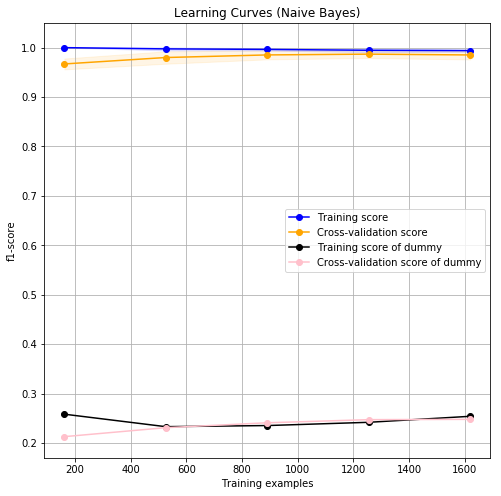

In [15]:
title = "Learning Curves (Naive Bayes)"
plot_learning_curve(MultinomialNB(alpha=0.05), title, X, y, ylim=(0.17, 1.05), cv=cv, n_jobs=2)
plt.show()

### Logistic Regressor

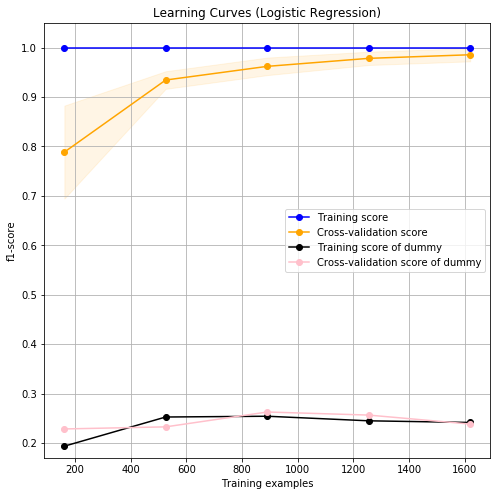

In [16]:
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(LogisticRegression(C= 100, solver='newton-cg'), title, X, y, (0.17, 1.05), cv=cv, n_jobs=2)
plt.show()

### knn

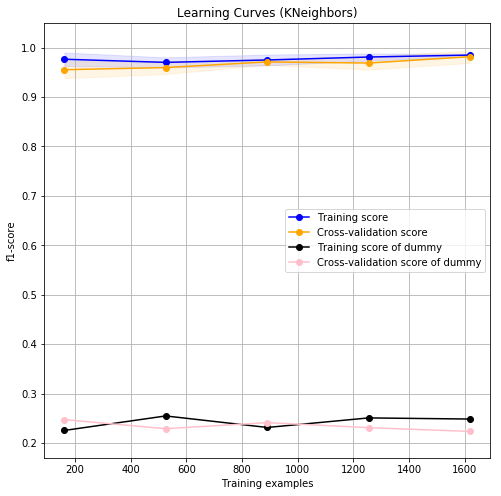

In [17]:
title = "Learning Curves (KNeighbors)"
plot_learning_curve(KNeighborsClassifier(n_neighbors=9), title, X, y, (0.17, 1.05), cv=cv, n_jobs=2)
plt.show()

## Precision-Recall curves

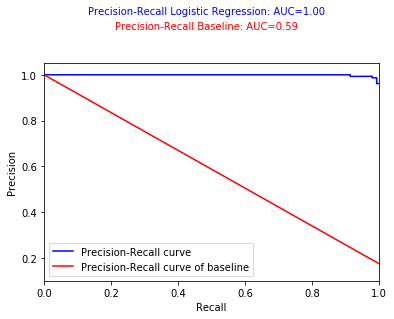

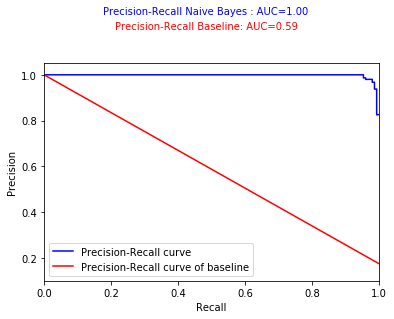

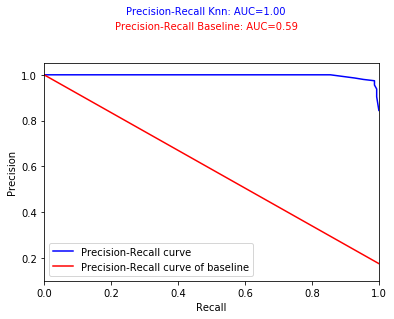

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

np.seterr(all='ignore')
estimators = {'Logistic Regression':LogisticRegression(C= 100, solver='newton-cg'), 'Naive Bayes ':MultinomialNB(alpha=0.05), 'Knn': KNeighborsClassifier(n_neighbors=9)}

for (name,estimator) in estimators.items():
    
    model =estimator
    model.fit(X_train_tfidf,y_train)
    pred = model.predict_proba(X_test_tfidf)
    precision, recall, thresholds = precision_recall_curve(y_test, pred[:,1])
    area = auc(recall, precision)
    
    dmodel = DummyClassifier(strategy='uniform')
    dmodel.fit(X_train_tfidf,y_train)
    dpred = dmodel.predict_proba(X_test_tfidf)
    dprecision, drecall, dthresholds = precision_recall_curve(y_test, dpred[:,1])
    darea = auc(drecall, dprecision)

    
    plt.plot(recall, precision, label='Precision-Recall curve',color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.1, 1.05])
    plt.xlim([0.0, 1.0])
    plt.figtext(0.5,1.05,'Precision-Recall %s: AUC=%0.2f' % (name,area), ha='center',color='blue')
    plt.figtext(0.5,1.0,'Precision-Recall %s: AUC=%0.2f' % ('Baseline',darea),ha='center',color='red')
    plt.plot(drecall, dprecision, label='Precision-Recall curve of baseline',color='red')
    plt.legend(loc="lower left")
    
    plt.show()